In [1]:
# [RDKitで薬らしさを定量的に評価する | 化学の新しいカタチ](https://future-chem.com/rdkit-qed/)
# https://future-chem.com/rdkit-qed/

In [16]:
from rdkit import rdBase, Chem
from rdkit.Chem import PandasTools, QED, Descriptors, rdMolDescriptors

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/yk/.pyenv/versions/anaconda3-5.3.1/envs/my-rdkit-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/yk/.pyenv/versions/anaconda3-5.3.1/envs/my-rdkit-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/yk/.pyenv/versions/anaconda3-5.3.1/envs/my-rdkit-env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# I used platinum dataset for SDF
df = PandasTools.LoadSDF('./sdf/platinum_dataset_2017_01.sdf')
df = df[:500]
len(df)

500

In [5]:
# calculate QED
df['QED'] = df.ROMol.map(QED.qed)

In [6]:
df['QED']

0      0.378048
1      0.417322
2      0.439287
3      0.364423
4      0.676902
         ...   
495    0.578973
496    0.503007
497    0.910003
498    0.873175
499    0.681963
Name: QED, Length: 500, dtype: float64

In [13]:
# define function
def rule_of_five(m):
    mw = Descriptors.MolWt(m)
    logp = Descriptors.MolLogP(m)
    hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
    hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
    psa = Descriptors.TPSA(m)
    if (mw <= 500 and logp <= 5 and hbd <= 5 and hba <= 10):
        return 1
    else:
        return 0

In [14]:
# calculate whether the rule of five is acceptable
df['Lipinski'] = df.ROMol.map(rule_of_five)

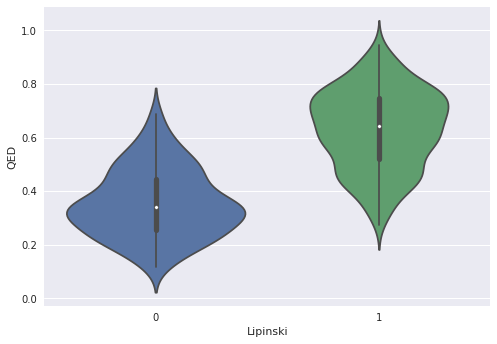

In [17]:
# draw a violin plot
with mpl.style.context('seaborn'):
    sns.violinplot(x='Lipinski', y='QED', data=df)